In [1]:
from typing import Annotated
from langchain.chat_models import ChatOpenAI
# from langchain_anthropic import ChatAnthropic
from typing_extensions import TypedDict
from dotenv import load_dotenv,find_dotenv,dotenv_values
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
import os

class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

openai_env = dotenv_values(find_dotenv(".env.openai_taobao"))
api_key = openai_env.get("API_KEY")
base_url = openai_env.get("BASE_URL")
llm = ChatOpenAI(
    temperature=0.2,
    api_key=api_key,
    base_url=base_url,
    model="gpt-3.5-turbo"
)

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
graph = graph_builder.compile()


C:\Users\20297\AppData\Local\Temp\ipykernel_58624\975124250.py:19: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(


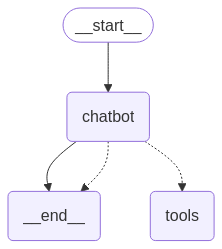

In [11]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

现在开始运行这个聊天机器人吧！
Tip: 你可以在任何时候使用键盘 "quit", "exit", or "q",结束聊天循环。

In [12]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break
           

Assistant: Hello! How can I assist you today?
Assistant: Hello! How can I assist you today?
Assistant: LangChain 是一个用于构建基于语言模型的应用程序的框架。它提供了一系列工具和组件，帮助开发者更容易地集成和使用大型语言模型（如 OpenAI 的 GPT 系列）来构建聊天机器人、问答系统、文本生成应用等。

LangChain 的主要特点包括：

1. **模块化设计**：LangChain 提供了多个模块，开发者可以根据需求选择合适的组件，例如文本生成、对话管理、数据存储等。

2. **链式调用**：LangChain 支持将多个处理步骤串联在一起，形成一个“链”，使得复杂的任务可以通过简单的配置来实现。

3. **支持多种语言模型**：LangChain 可以与多种语言模型进行集成，不仅限于 OpenAI 的模型，还可以支持其他开源模型。

4. **数据连接**：LangChain 可以与外部数据源（如数据库、API 等）进行连接，增强语言模型的能力，使其能够处理更复杂的查询和任务。

5. **可扩展性**：开发者可以根据自己的需求扩展 LangChain 的功能，创建自定义的组件和链。

通过使用 LangChain，开发者可以更高效地构建和部署基于语言模型的应用，降低了开发的复杂性。
Assistant: I'm sorry, I cannot fulfill that request.
Assistant: 抱歉，我无法提供实时新闻更新。不过，你可以通过新闻网站、社交媒体或新闻应用程序获取最新的信息。如果你有兴趣了解某个特定主题或事件，我可以提供相关背景信息或讨论。
Assistant: 截至2023年10月，OpenAI的新闻主要集中在以下几个方面：

1. **新产品发布**：OpenAI不断推出新版本的GPT模型，例如GPT-4，增强了自然语言处理的能力，并在多个应用场景中得到了广泛应用。

2. **合作与伙伴关系**：OpenAI与多家企业和机构建立了合作关系，推动人工智能技术的应用，包括与微软的深度合作，微软在其产品中集成了OpenAI的技术。

3. **伦理与安全**：OpenAI在人工智能的伦理和安全性方面持续进行研究，

添加工具节点

In [10]:
from typing import Annotated
# from langchain.chat_models import ChatOpenAI
from langchain_openai.chat_models import ChatOpenAI
# from langchain_anthropic import ChatAnthropic
from typing_extensions import TypedDict
from dotenv import load_dotenv,find_dotenv,dotenv_values
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
import os
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode, tools_condition


from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

openai_env = dotenv_values(find_dotenv(".env.openai_taobao"))
api_key = openai_env.get("API_KEY")
base_url = openai_env.get("BASE_URL")
llm = ChatOpenAI(
    temperature=0.2,
    api_key=api_key,
    base_url=base_url,
    model="gpt-3.5-turbo"
)
os.environ["TAVILY_API_KEY"] = "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"
search = TavilySearchResults( max_results=2)
tools = [search]
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.

graph_builder.add_node("chatbot", chatbot)
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
graph = graph_builder.compile(checkpointer=memory)
